# Biodiversity in National Parks

## Introduction
The goal of this project is to analyze biodiversity data in National Parks, particularly in Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, and Yellowstone National Park, to better understand the distribution of the conservation status of species in these parks.

This project will scope, analyze, prepare/clean, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

 - What is the distribution of conservation status for species\?
 - Are certain types of species more likely to be endangered?
 - Are the differences between species and their conservation status significant?
 - Which species are **In Recovery** and what is the overall distributions in the parks compared to the average observations of the species with other conservation statuses?


In [14]:
#Importing the Python modules to be used in the project
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Data Sources

Both `observations.csv` and `species_info.csv` was provided by Codecademy.com

*Note: The data for this project is inspired by real data, but is mostly_fictional.*

The data from the `species_info.csv` and `observations.csv` files will be read into `DataFrames` so that the data can be explored and visualized in Python.

In [17]:
#Create dataframes for the csv files
species_info = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

### species_info.csv

This is the file that contains information pertaining to the various species in the National Parks.

It has four columns:
- **category**: The category of taxonomy for each species
- **scientific_name**: The scientific name of the species
- **common_names**: The common name(s) of the species
- **conservation_status**: The conservation status of the species ('Species of Concern' 'Endangered' 'Threatened' 'In Recovery'). If null, then the species is not in danger.

The `species_info` table consists of 5824 rows and 4 columns.

In [19]:
#Determine the number of records and number of columns that exist within the table
print("Number of Rows:" + str(species_info.shape[0]))
print("Number of Columns:" + str(species_info.shape[1]))
#Preview of the first 5 rows
species_info.head()


Number of Rows:5824
Number of Columns:4


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations.csv

This is the file that contains information from recorded sightings of different species throughout the national parks in the past 7 days.

It has three columns:
- **scientific_name**: The scientific name of the species
- **park_name**: The name of the National Park
- **observations**: The number of observations in the past 7 days

The `observations` table consists of 23296 rows and 3 columns.

In [21]:
#Determine the number of records and number of columns that exist within the table
print("Number of Rows:" + str(observations.shape[0]))
print("Number of Columns:" + str(observations.shape[1]))
#Preview of the first 5 rows
observations.head()

Number of Rows:23296
Number of Columns:3


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Explore and Prepare the Data

### species_info

Based on the summary of the table, it looks the `category` column has 7 unique values and the `conservation_status` column has 4 unique values. The unique values and counts of the `scientific_name` and `common_names` columns do not match the count indicating that there are duplicates. We will explore this further later on. Additionally, since the count of `conservation_status` does not equal the total number of records/rows in the table, we can assume there are some null values.



In [25]:
#Table summary information
species_info.describe(include = 'all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


There are no null values in other columns besides the `conservation_status` column. The column has 5633 null values. As observed earlier in the project, the null values signify species that are not in danger of extinction.

In [27]:
# Check to see if there are any null values in the data 
species_info.isna().value_counts()

category  scientific_name  common_names  conservation_status
False     False            False         True                   5633
                                         False                   191
Name: count, dtype: int64

The `category` column has the following 7 unique values: 
- Mammal
- Bird
- Reptile
- Amphibian
- Fish
- Vascular Plant
- Nonvascular Plant


In [29]:
print("Unique list of categories of taxonomy: " + str(species_info.category.unique()))

Unique list of categories of taxonomy: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [30]:
species_info.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

The `conservation_status` column has the following 4 unique values:
- **Species of Concern**:  declining or appear to be in need of conservation
- **Endangered**: seriously at risk of extinction
- **Threatened**: vulnerable to endangerment in the near future
- **In Recovery**: formerly Endangered, but in recovery of endangerment

In [32]:
print("Unique list of conservation statuses: " + str(species_info.conservation_status.unique()))

Unique list of conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [33]:
species_info.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

Based on initial analysis, we know that there are duplicates in the `scientific_name` and `common_names` columns, individually. However, it looks like there are no duplicate rows within the `species_info` table. 

In [35]:
species_info.duplicated().value_counts()

False    5824
Name: count, dtype: int64

After taking a look at the `species_info` table, there are two records with duplicate records that have the same `scientific_name` and `common_names`. After further investigation, it looks like the two species are duplicated in the table because the conservation_statuses are different. When we look at the observations table for these species, it seems like the species appear more often in some National Parks vs others. Since there are only two records that have this issue, we will remove the duplicates, but keep the records that have the more severe conservation status.

In [37]:
#Duplicates with the same scientific and common names
species_info.duplicated(subset=['scientific_name','common_names']).value_counts()

False    5822
True        2
Name: count, dtype: int64

In [38]:
#Which species are duplicated
species_info[species_info.duplicated(subset=['scientific_name','common_names']) == True]

,category,scientific_name,common_names,conservation_status
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [39]:
#Let's look at Canis lupus
species_info[species_info.scientific_name == "Canis lupus"]

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [40]:
#Let's look at Oncorhynchus mykiss
species_info[species_info.scientific_name == "Oncorhynchus mykiss"]

,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


In [41]:
#Let's take a look at them in the observations table
observations[(observations.scientific_name == "Oncorhynchus mykiss") | (observations.scientific_name =="Canis lupus")]

,scientific_name,park_name,observations
167,Oncorhynchus mykiss,Yosemite National Park,118
925,Oncorhynchus mykiss,Bryce National Park,59
1294,Canis lupus,Yosemite National Park,35
1766,Canis lupus,Bryce National Park,27
3354,Oncorhynchus mykiss,Great Smoky Mountains National Park,61
4649,Oncorhynchus mykiss,Yellowstone National Park,119
7346,Canis lupus,Bryce National Park,29
8682,Oncorhynchus mykiss,Yellowstone National Park,253
9884,Canis lupus,Bryce National Park,74
10190,Canis lupus,Great Smoky Mountains National Park,15


In [42]:
#Drop duplicates but keep last record
species_info = species_info.drop_duplicates(subset = ['scientific_name','common_names'], keep = 'last')
species_info[(species_info.scientific_name == "Oncorhynchus mykiss") | (species_info.scientific_name == "Canis lupus")]

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


We know that the `scientific_name` and `common_names` are duplicated. The `scientific_name` can be used to join to the `observations` table. That is why we will be removing the duplicate records within that column will result in a more tidy dataset. 

Based on our analysis, there are **281** `scientific_name` duplicates. Upon further investigations, seems like the conservation status does not differ in the duplicates.

After removing the duplicates, there are now **5541** records in the `species_info` table.

In [44]:
#Duplicates within scientific_name
species_info[species_info.scientific_name.duplicated() == True]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
3028,Mammal,Mustela vison,"American Mink, Mink",NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [45]:
#Notice sometimes the conservation status could differ. 
#Lets check the count of duplicates when considering conservation_status and scientific_name
species_info.duplicated(subset = ['scientific_name','conservation_status']).value_counts()

False    5541
True      281
Name: count, dtype: int64

In [46]:
#Drop the duplicates in scientific name and verify counts. We should have 5541 records
species_info = species_info.drop_duplicates(subset = ['scientific_name'])
print("There are " + str(species_info.shape[0]) + " records in the species_info table.")
species_info.describe()

There are 5541 records in the species_info table.


,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,179
unique,7,5541,5229,4
top,Vascular Plant,Clethrionomys gapperi gapperi,Brachythecium Moss,Species of Concern
freq,4262,1,7,151


After removing the `scientific_names` duplicates, we notice that there are still a significant amount of `common_names` duplicates. Upon spot-checking, it looks like some of the data is a little dirty with spelling mistakes and some might be subspecies of the large species. Since I cannot confirm this, we will ignore the duplicates in this column. 

*Note: The `common_names` column is not important for this project. It is a column that provides additional information so for this project we will ignore the duplicates within this column.*

In [48]:
#For sanity sake, let's take a look at the duplicate common_names
species_info[species_info.common_names.duplicated() == True]

,category,scientific_name,common_names,conservation_status
59,Mammal,Oryzomys palustris palustris,Marsh Rice Rat,NaN
124,Bird,Melanitta fusca,White-Winged Scoter,NaN
243,Bird,Anthus spinoletta,Water Pipit,NaN
278,Bird,Vermivora chrysoptera X pinus,Brewster's Warbler,NaN
280,Bird,Vermivora lawrencii,Lawrence's Warbler,NaN
...,...,...,...,...
5753,Vascular Plant,Rosa woodsii var. ultramontana,Woods' Rose,NaN
5757,Vascular Plant,Rubus parviflorus,"Thimbleberry, Western Thimbleberry",NaN
5788,Vascular Plant,Ribes viscosissimum,Sticky Currant,NaN
5795,Vascular Plant,Heuchera rubescens var. glandulosa,Pink Alumroot,NaN


In [49]:
#Let us take a look at example
print(species_info[species_info.common_names == "Lawrence's Warbler"])

    category      scientific_name        common_names conservation_status
279     Bird  Vermivora lawrencei  Lawrence's Warbler                 NaN
280     Bird  Vermivora lawrencii  Lawrence's Warbler                 NaN


We will set the species not in danger of extinction as "Not in danger of extinction". Confirmed that 5362 null values are set to "Not in danger of extinction" in the `conservation_status` column.

In [51]:
#Number of null conservation_status
species_info.conservation_status.isna().value_counts()

conservation_status
True     5362
False     179
Name: count, dtype: int64

In [52]:
#As seen the conservation status is replaced by No Intervention for null
species_info.fillna('Not in danger of extinction', inplace=True)
species_info.groupby("conservation_status").size()

conservation_status
Endangered                       15
In Recovery                       3
Not in danger of extinction    5362
Species of Concern              151
Threatened                       10
dtype: int64

After tidying the data, the `species_info` table now consists of 5541 rows and 4 columns.

In [54]:
#Determine the number of records and number of columns that exist within the table
print("Number of Rows:" + str(species_info.shape[0]))
print("Number of Columns:" + str(species_info.shape[1]))

Number of Rows:5541
Number of Columns:4


### observations

Based on the summary of the table, it looks the `scientific` column has 5541 unique values which matches the unique values `species_info` table. `park_name` column has 4 unique values. There are no null values in either of the columns in the `observations` table.

In [57]:
#Table summary information
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [58]:
# Check to see if there are any null values in the data 
observations.isna().value_counts()

scientific_name  park_name  observations
False            False      False           23296
Name: count, dtype: int64

Based on earlier exploration, we noticed that multiple rows can exist with the same `scientific_name` and `park_name` but have different numbers in the `observations`(Example Below). We summarized the `observations` based on `scientific_name` and `park_name` combination. 

In [60]:
observations[observations.scientific_name == "Canis lupus"].sort_values(by = 'park_name')

,scientific_name,park_name,observations
1766,Canis lupus,Bryce National Park,27
7346,Canis lupus,Bryce National Park,29
9884,Canis lupus,Bryce National Park,74
10190,Canis lupus,Great Smoky Mountains National Park,15
17756,Canis lupus,Great Smoky Mountains National Park,14
20353,Canis lupus,Great Smoky Mountains National Park,30
10268,Canis lupus,Yellowstone National Park,60
10907,Canis lupus,Yellowstone National Park,67
13427,Canis lupus,Yellowstone National Park,203
1294,Canis lupus,Yosemite National Park,35


In [61]:
observations = observations.groupby(["scientific_name","park_name"]).observations.sum().reset_index()

In [62]:
observations[observations.scientific_name == "Canis lupus"]

,scientific_name,park_name,observations
3216,Canis lupus,Bryce National Park,130
3217,Canis lupus,Great Smoky Mountains National Park,59
3218,Canis lupus,Yellowstone National Park,330
3219,Canis lupus,Yosemite National Park,196



After tidying the data, the`observations` table now consists of 22164  rows an 3  columns.

In [64]:
#Determine the number of records and number of columns that exist within the table
print("Number of Rows:" + str(observations.shape[0]))
print("Number of Columns:" + str(observations.shape[1]))

Number of Rows:22164
Number of Columns:3


## Analysis

We started with looking at the overall distribution of the different categories and the conservation status.

In order to different to identify the species that are protected, we added an additional column to the `species` table called `is_protected`. We accounted that **5362** species are not in the conservation program while **179** species are in the conservation program.

In [67]:
species_info['is_protected'] = species_info.conservation_status != "Not in danger of extinction"
species_info.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in danger of extinction,False
1,Mammal,Bos bison,"American Bison, Bison",Not in danger of extinction,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not in danger of extinction,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not in danger of extinction,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not in danger of extinction,False


In [68]:
species_info.is_protected.value_counts()

is_protected
False    5362
True      179
Name: count, dtype: int64

From the table below, majority of the species are not in danger of extinction, but *Mammals* and *Birds* have a greater percentage of species in danger of extinction compared to the other categories.

In [70]:
category_stats = species_info.groupby(["category","is_protected"]).size().reset_index().pivot(columns = 'is_protected', index = 'category').reset_index()

category_stats.columns = ['category', 'not_protected', 'protected']
category_stats['percent_protected'] = (category_stats.protected / (category_stats.not_protected + category_stats.protected))*100
category_stats

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,114,11,8.800000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


We ran some chi-squared tests to see if different categories have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The results from the chi-squared test returns many values, the second value  is the p-value. The standard p-value to test statistical significance is 0.05. Anything above this value is not statistically significant.

We will run through all the different categories to see if there are any significant statistical differences.

While Mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference. You can take a look at the table below for more in depth information of the different categories.

In [72]:
#Create a dictionary with a list:
from scipy.stats import chi2_contingency

# We will put data into a data frame 
stat_sig = pd.DataFrame()

for i in range(7):
    cat1 = category_stats.iloc[i].category
    prot1 = category_stats.iloc[i].protected
    nprot1 = category_stats.iloc[i].not_protected
    j = i + 1
    while j < 7:
        cat2 = category_stats.iloc[j].category
        prot2 = category_stats.iloc[j].protected
        nprot2 = category_stats.iloc[j].not_protected
        contingency1 = [[prot1, nprot1],
              [prot2, nprot2]]
        chi = chi2_contingency(contingency1)
        if chi[1]<0.05:
            sig = "Statistically Significant"
        else:
            sig = "Not Statistically Significant"
        stat_sig = pd.concat([pd.DataFrame([[cat1,cat2,chi[1],sig]], columns=["Category1","Category2", "p-value","Significant?"]), stat_sig], ignore_index=True)
        j+=1
    i+=1
stat_sig

,Category1,Category2,p-value,Significant?
0,Reptile,Vascular Plant,1.450522e-04,Statistically Significant
1,Nonvascular Plant,Vascular Plant,6.623419e-01,Not Statistically Significant
2,Nonvascular Plant,Reptile,3.362698e-02,Statistically Significant
3,Mammal,Vascular Plant,1.440507e-55,Statistically Significant
4,Mammal,Reptile,3.835559e-02,Statistically Significant
5,Mammal,Nonvascular Plant,1.481869e-10,Statistically Significant
6,Fish,Vascular Plant,1.139913e-12,Statistically Significant
7,Fish,Reptile,7.286746e-01,Not Statistically Significant
8,Fish,Nonvascular Plant,4.587125e-04,Statistically Significant
9,Fish,Mammal,5.948567e-02,Not Statistically Significant


Below you will find the count of species in each category that belong to each of the conservation statuses.

Based on the category statistics above, it looks like majority of the `Bird` and `Mammal` population fall under the `Species of Concern` category. Additionally, no other category besides `Bird` are `In Recovery`. 

In [74]:
conservation_cat= species_info[species_info.conservation_status != "Not in danger of extinction"].groupby(["conservation_status", "category"])\
                    .scientific_name.count().unstack()

conservation_cat

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In order to visualize the data, we merged the `species_info` and `observations` tables into one table called `species_obs`. We will use this table going forward.

In [76]:
species_obs = pd.merge(observations,species_info,how = 'left')
species_obs.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Abies bifolia,Bryce National Park,109,Vascular Plant,Rocky Mountain Alpine Fir,Not in danger of extinction,False
1,Abies bifolia,Great Smoky Mountains National Park,72,Vascular Plant,Rocky Mountain Alpine Fir,Not in danger of extinction,False
2,Abies bifolia,Yellowstone National Park,215,Vascular Plant,Rocky Mountain Alpine Fir,Not in danger of extinction,False
3,Abies bifolia,Yosemite National Park,136,Vascular Plant,Rocky Mountain Alpine Fir,Not in danger of extinction,False
4,Abies concolor,Bryce National Park,83,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",Not in danger of extinction,False


Next, we wanted to see how the species **In Recovery** stood up against the average of the other `conservation_status` values in each of the National Parks.

We generated a `DataFrame` that stored the average number of `observations` for each `conservation_status` in each National Park. We plotted the values on a side by side bar plot. *Yellowstone* had a greater number of `observations` overall compared to the other parks.

In [78]:
status_avg = species_obs[(species_obs.conservation_status != 'In Recovery')].groupby(["conservation_status","park_name"]).observations\
        .mean().reset_index().sort_values(by=["park_name","observations"])
status_avg

,conservation_status,park_name,observations
0,Endangered,Bryce National Park,32.600000
12,Threatened,Bryce National Park,59.100000
8,Species of Concern,Bryce National Park,98.841060
4,Not in danger of extinction,Bryce National Park,104.394256
1,Endangered,Great Smoky Mountains National Park,22.266667
13,Threatened,Great Smoky Mountains National Park,44.000000
9,Species of Concern,Great Smoky Mountains National Park,68.304636
5,Not in danger of extinction,Great Smoky Mountains National Park,78.430250
2,Endangered,Yellowstone National Park,81.866667
14,Threatened,Yellowstone National Park,145.900000


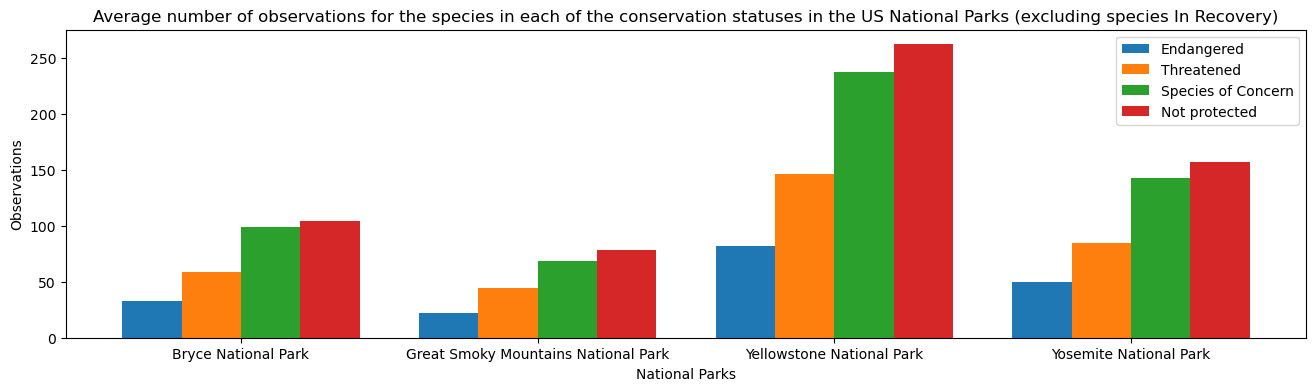

<Figure size 640x480 with 0 Axes>

In [129]:
#unique park values
parks = status_avg.park_name.unique()
conserv_status = status_avg.conservation_status.unique()
y_endangered = status_avg[status_avg.conservation_status == "Endangered"].observations.tolist()
y_threatened = status_avg[status_avg.conservation_status == "Threatened"].observations.tolist()
y_concern = status_avg[status_avg.conservation_status == "Species of Concern"].observations.tolist()
y_not_prot = status_avg[status_avg.conservation_status == "Not in danger of extinction"].observations.tolist()


plt.figure(figsize=(16, 4))
#Create a loop
t = 4 # Number of datasets (4 conservation_status + 3 in recovery species)
d = 4 # Number of sets of bars (4 National parks)
w = 0.8 # Width of each bar

n = 1  # This is our first dataset (out of 4)
x_endangered = [t*element + w*n for element
             in range(d)]
plt.bar(x_endangered,y_endangered, label = "Endangered")

n = 2  # This is our second dataset (out of 4)
x_threatened = [t*element + w*n for element
             in range(d)]
plt.bar(x_threatened,y_threatened, label = "Threatened")

n = 3  # This is our third dataset (out of 4)
x_concern = [t*element + w*n for element
             in range(d)]
plt.bar(x_concern,y_concern, label = "Species of Concern")

n = 4  # This is our fourth dataset (out of 4)
x_not_prot = [t*element + w*n for element
             in range(d)]
plt.bar(x_not_prot,y_not_prot, label = "Not protected")
plt.legend()
x_pos = [(a + b + c + d)/4 for a,b,c,d in zip(x_endangered,x_threatened,x_concern,x_not_prot)]
plt.xticks(x_pos, parks)
plt.title('Average number of observations for the species in each of the conservation statuses in the US National Parks (excluding species In Recovery)')
plt.xlabel('National Parks')
plt.ylabel('Observations')
plt.show()
plt.clf()

Next, we generated a `DataFrame` with the observations of the **In Recovery** species and their observations in each of the National Parks and stacked those values against the averages.

In *Bryce National Park*, the `observations` for the **Bald Eagle** and **Brown Pelican** were around or close to the average `observations` of the *Species of Concern*, but the `observations` for the **American Peregrine Falcon** fell in between *Species of Concern* and *Threatened*.

In *Great Smoky Mountains National Park*, the `observations` for the **American Peregrine Falcon** were around the average `observations` of the *Species of Concern*, but the `observations` for the **Bald Eagle** were higher than the average `observations` for *Species of Concern* species but lower than the average `observations` for *Not Protected* species in the National Park.The __Brown Pelican__ observations fell in between *Species of Concern* and *Threatened*.

In *Yellowstone National Park*, The **American Peregrine Falcon**, the **Bald Eagle** and the **Brown Pelican** `observations` were in between *Species of Concern* and *Threatened*. 

In *Yosemite National Park*, the **American Peregrine Falcon** had `observations` that were higher than the average `observations` for *Species of Concern* species but lower than the average `observations` for *Not Protected* species in the National Park. The **Bald Eagle** and the **Brown Pelican** `observations` were in between *Species of Concern* and *Threatened*. 

In [81]:
In_Recovery = species_obs[(species_obs.is_protected == True) & (species_obs.conservation_status == 'In Recovery')]\
        .groupby(["scientific_name","common_names","park_name"]).observations.sum().reset_index()
In_Recovery

,scientific_name,common_names,park_name,observations
0,Falco peregrinus anatum,American Peregrine Falcon,Bryce National Park,72
1,Falco peregrinus anatum,American Peregrine Falcon,Great Smoky Mountains National Park,70
2,Falco peregrinus anatum,American Peregrine Falcon,Yellowstone National Park,176
3,Falco peregrinus anatum,American Peregrine Falcon,Yosemite National Park,152
4,Haliaeetus leucocephalus,Bald Eagle,Bryce National Park,94
5,Haliaeetus leucocephalus,Bald Eagle,Great Smoky Mountains National Park,72
6,Haliaeetus leucocephalus,Bald Eagle,Yellowstone National Park,187
7,Haliaeetus leucocephalus,Bald Eagle,Yosemite National Park,112
8,Pelecanus occidentalis,Brown Pelican,Bryce National Park,92
9,Pelecanus occidentalis,Brown Pelican,Great Smoky Mountains National Park,47


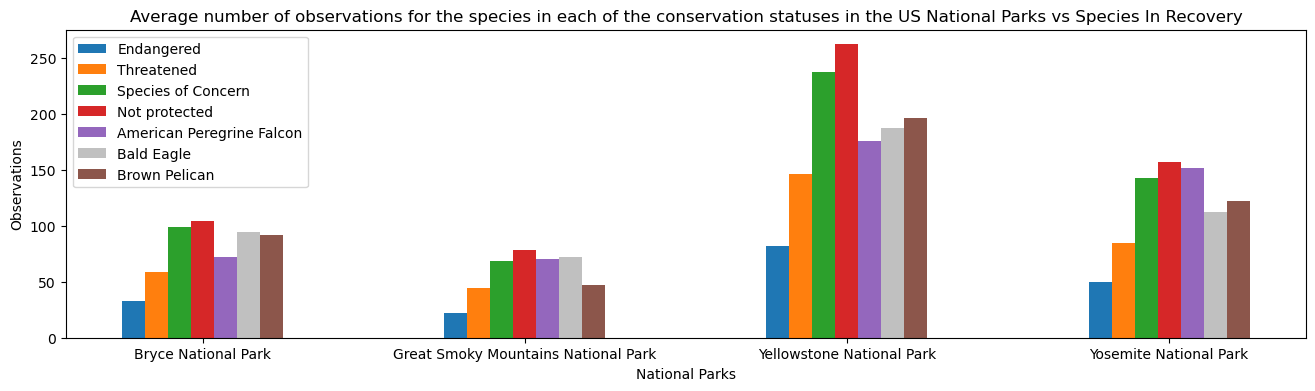

<Figure size 640x480 with 0 Axes>

In [131]:
#unique park values
parks = status_avg.park_name.unique()
conserv_status = status_avg.conservation_status.unique()
y_endangered = status_avg[status_avg.conservation_status == "Endangered"].observations.tolist()
y_threatened = status_avg[status_avg.conservation_status == "Threatened"].observations.tolist()
y_concern = status_avg[status_avg.conservation_status == "Species of Concern"].observations.tolist()
y_not_prot = status_avg[status_avg.conservation_status == "Not in danger of extinction"].observations.tolist()
y_falcon = In_Recovery[In_Recovery.scientific_name == "Falco peregrinus anatum"].observations.tolist()
y_eagle = In_Recovery[In_Recovery.scientific_name == "Haliaeetus leucocephalus"].observations.tolist()
y_pelican = In_Recovery[In_Recovery.scientific_name == "Pelecanus occidentalis"].observations.tolist()

plt.figure(figsize=(16, 4))
#Create a loop
t = 7 # Number of datasets (4 conservation_status + 3 In Recovery species)
d = 4 # Number of sets of bars (4 National Parks )
w = 0.5 # Width of each bar

n = 1  # This is our first dataset (out of 7)
x_endangered = [t*element + w*n for element
             in range(d)]
plt.bar(x_endangered,y_endangered, label = "Endangered",width = 0.5)

n = 2  # This is our second dataset (out of 7)
x_threatened = [t*element + w*n for element
             in range(d)]
plt.bar(x_threatened,y_threatened, label = "Threatened",width = 0.5)

n = 3  # This is our third dataset (out of 7)
x_concern = [t*element + w*n for element
             in range(d)]
plt.bar(x_concern,y_concern, label = "Species of Concern",width = 0.5)

n = 4  # This is our fourth dataset (out of 7)
x_not_prot = [t*element + w*n for element
             in range(d)]
plt.bar(x_not_prot,y_not_prot, label = "Not protected",width = 0.5)

n = 5  # This is our fifth dataset (out of 7)
x_falcon = [t*element + w*n for element
             in range(d)]
plt.bar(x_falcon,y_falcon, label = "American Peregrine Falcon",  width = 0.5)

n = 6  # This is our sixth dataset (out of 7)
x_eagle = [t*element + w*n for element
             in range(d)]
plt.bar(x_eagle,y_eagle, label = "Bald Eagle",  width = 0.5, color = 'silver')

n = 7  # This is our seventh dataset (out of 7)
x_pelican = [t*element + w*n for element
             in range(d)]
plt.bar(x_pelican,y_pelican, label = "Brown Pelican",  width = 0.5)

plt.legend()
x_pos = [(a + b + c + d + e + f + g)/7 for a,b,c,d,e,f,g in zip(x_endangered,x_threatened,x_concern,x_not_prot,x_falcon,x_eagle,x_pelican)]
plt.xticks(x_pos, parks)
plt.title('Average number of observations for the species in each of the conservation statuses in the US National Parks vs Species In Recovery')
plt.xlabel('National Parks')
plt.ylabel('Observations')
plt.show()
plt.clf()

## Conclusions


The project was able to make several data visualizations and inferences about the diversity of the National Parks that comprised this data set.

This project was also able to answer some of the questions posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,362 vs 179)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While Mammals and Birds did not have significant difference in conservation percentage, there were other categories that exhibited a
      statistically significant difference like Mammals and Reptiles.
- Which species are **In Recovery** and what is the overall distributions in the parks compared to the average observations of the species with other conservation statuses?
    - The study found that the species **In Recovery** belonged to the *Birds* category.
    - There were three species: Falco peregrinus anatum (American Peregrine Falcon), Haliaeetus leucocephalus (Bald Eagle) and Pelecanus occidentalis
      (Brown Pelican)
    - The observations for the **In Recovery** species fell mostly between the average value for *Species of Concern* and *Threatened*  or close to the
      average value for *Species of Concern* which is what is expected. However, there were a few instances where that was not the case. 
    - In *Yosemite*, the __American Peregrine Falcon__ had observations that were higher than the average observations for _Species of Concern_ species
      but lower than the average observations for _Not Protected_ species in the National Park. The __Bald Eagle__ and the __Brown Pelican__ fell in
      between _Threatened_ and _Species of Concern_.
    - In *Great Smoky Mountains*, the observations for the __American Peregrine Falcon__ were around the average observations of
      the Species of Concern, but the observations for the __Bald Eagle__ were higher than the average observations for Species of Concern species but
      lower than the average observations for Not Protected species in the National Park. The __Brown Pelican__ observations fell in
      between _Threatened_ and _Species of Concern_.

## Further Analysis
- This dataset only included observations from the last 7 days. It would be curious to see how the conservation status for various species changes over time. 
- Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. 
- Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 